# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

<span style="color:#107896", max-width="105ex">
This is a binary classification problem, since the prediction the system is required to do is of categorical kind, out of two mutually exclusive outputs, that is: "student passes" and "student fails"
</span>

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [405]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


pd.set_option('display.width', 500)

In [406]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [407]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.shape[0]
n_features = student_data.shape[1] - 1
n_passed = student_data.passed.value_counts()['yes']
n_failed = student_data.passed.value_counts()['no']
grad_rate = np.float(n_passed)/n_students*100
print "\nTotal number of students:      {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features:            {}".format(n_features)
print "Graduation rate of the class:  {:.2f}%".format(grad_rate)


Total number of students:      395
Number of students who passed: 265
Number of students who failed: 130
Number of features:            30
Graduation rate of the class:  67.09%


#### A more detailed view of available data through a Data Quality Report

Let's define a Python class that collects more detailed central tendency information about the available data

In [408]:
class DataQualityReport(object):    
    '''
    Report about data basic statistics
    '''
    
    CONT_TABLE_COLS = ['count', 'missing', 'cardinality', 'min', '1st_quartile', 
                       'mean', 'median', '3rd_quartile', 'max', 'std_dev']
    CAT_TABLE_COLS  = ['count', 'missing', 'cardinality', 'mode', 'mode_freq', 
                       'mode_percent', '2nd_mode', '2nd_mode_freq', '2nd_mode_percent']
        
    def __init__(self, df, continuous_features, categorical_features):
        '''
        Constructor
        Parameters:
            df - pandas DataFrame object containing the dataset
            categorical_features - the list of feature names of categorical type
            continuous_features - the list of feature names of continuous type
        '''
        self._continuous_features   = continuous_features
        self._categorical_features  = categorical_features

        self.cont_table = pd.DataFrame(columns=DataQualityReport.CONT_TABLE_COLS, index=continuous_features)
        self.cat_table  = pd.DataFrame(columns=DataQualityReport.CAT_TABLE_COLS, index=categorical_features)
        self.cont_table.index.name = 'feature'
        self.cat_table.index.name = 'feature'
        stats = df.describe()
        self._populate_cont_table(df, stats)
        self._populate_cat_table(df, stats)
  
    def _populate_cont_table(self, df, stats):
        for feature in self._continuous_features:
            self.cont_table['count'][feature]           = df[feature].value_counts().sum()
            self.cont_table['missing'][feature]         = df[feature].isnull().sum()
            self.cont_table['cardinality'][feature]     = df[feature].unique().shape[0]
            self.cont_table['min'][feature]             = stats[feature]['min']
            self.cont_table['1st_quartile'][feature]    = stats[feature]['25%']
            self.cont_table['mean'][feature]            = stats[feature]['mean']
            self.cont_table['median'][feature]          = stats[feature]['50%']
            self.cont_table['3rd_quartile'][feature]    = stats[feature]['75%']
            self.cont_table['max'][feature]             = stats[feature]['max']
            self.cont_table['std_dev'][feature]         = stats[feature]['std']
            
            
    def _populate_cat_table(self, df, stats):
        for feature in self._categorical_features:
            self.cat_table['count'][feature]           = df[feature].value_counts().sum()
            self.cat_table['missing'][feature]         = df[feature].isnull().sum()
            self.cat_table['cardinality'][feature]     = df[feature].unique().shape[0]
            vc = df[feature].value_counts()
            self.cat_table['mode'][feature]            = vc.index[0]
            self.cat_table['mode_freq'][feature]       = vc.values[0]
            self.cat_table['mode_percent'][feature]    = float(vc.values[0])/vc.sum()*100
            if vc.shape[0] > 1:
                self.cat_table['2nd_mode'][feature]            = vc.index[1]
                self.cat_table['2nd_mode_freq'][feature]       = vc.values[1]
                self.cat_table['2nd_mode_percent'][feature]    = float(vc.values[1])/vc.sum()*100

In our dataset, we find the following continuous/numeric descriptive features:

In [409]:
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 
                    'goout', 'Dalc', 'Walc', 'health', 'absences']

and the following categorical features:

In [410]:
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher','internet', 'romantic']

Let's build a data quality report:

In [411]:
dqr = DataQualityReport(student_data, numeric_features, categorical_features)

print data quality report for numeric features:

In [412]:
print "\nNUMERIC FEATURES DATA QUALITY REPORT:"
dqr.cont_table


NUMERIC FEATURES DATA QUALITY REPORT:


,count,missing,cardinality,min,1st_quartile,mean,median,3rd_quartile,max,std_dev
feature,,,,,,,,,,
age,395,0,8,15,16,16.6962,17,18,22,1.27604
Medu,395,0,5,0,2,2.74937,3,4,4,1.09474
Fedu,395,0,5,0,2,2.52152,2,3,4,1.0882
traveltime,395,0,4,1,1,1.4481,1,2,4,0.697505
studytime,395,0,4,1,1,2.03544,2,2,4,0.83924
failures,395,0,4,0,0,0.334177,0,0,3,0.743651
famrel,395,0,5,1,4,3.9443,4,5,5,0.896659
freetime,395,0,5,1,3,3.23544,3,4,5,0.998862
goout,395,0,5,1,2,3.10886,3,4,5,1.11328


and print data quality report table for categorical features:

In [413]:
print "\nCATEGORICAL FEATURES DATA QUALITY REPORT:"
dqr.cat_table


CATEGORICAL FEATURES DATA QUALITY REPORT:


,count,missing,cardinality,mode,mode_freq,mode_percent,2nd_mode,2nd_mode_freq,2nd_mode_percent
feature,,,,,,,,,
school,395,0,2,GP,349,88.3544,MS,46,11.6456
sex,395,0,2,F,208,52.6582,M,187,47.3418
address,395,0,2,U,307,77.7215,R,88,22.2785
famsize,395,0,2,GT3,281,71.1392,LE3,114,28.8608
Pstatus,395,0,2,T,354,89.6203,A,41,10.3797
Mjob,395,0,5,other,141,35.6962,services,103,26.0759
Fjob,395,0,5,other,217,54.9367,services,111,28.1013
reason,395,0,4,course,145,36.7089,home,109,27.5949
guardian,395,0,3,mother,273,69.1139,father,90,22.7848


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [414]:
# Extract feature (X) and target (y) columns

feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print
print "Target column: {}".format(target_col)

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


In [415]:
X_all = student_data[feature_cols]  # feature values for all students
print "\nFeature values:-"
display(X_all.head())  # print the first 5 rows



Feature values:-


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [416]:
print "\nTarget values:-"
y_all = student_data[target_col]  # corresponding targets/labels
y_all.head()


Target values:-


0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [417]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [480]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
from sklearn import cross_validation as cv

X_train, X_test, y_train, y_test = cv.train_test_split(X_all, y_all, test_size=num_test, 
                                                       random_state=433024223)

print "Training set: {} samples".format(X_train.shape[0])
print "Test set:      {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set:      95 samples


Verify that proportions for the target feature levels, namely 'yes' and 'no', are kept afpter dataset splitting:

In [481]:
print "Rate of passed in training set is {:.2f}%".format(100.0*y_train.value_counts()['yes']/num_train)

Rate of passed in training set is 67.67%


In [482]:
print "Rate of passed in test set is {:.2f}%".format(100.0*y_test.value_counts()['yes']/num_test)

Rate of passed in test set is 65.26%


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

#### Define a class to collect performance measures for each experiment

In [483]:
class PerformanceTable(object):
    '''
    Collect measures of performance for a specific experiment
    '''

    MEASURES = ["TRAIN_TIME", "PREDICT_TIME_TRAIN", "PREDICT_TIME_TEST", "F1SCORE_TRAIN", "F1SCORE_TEST"]
    
    def __init__(self, training_set_sizes):
        '''
        Constructor
        '''
        self.table = pd.DataFrame(columns=PerformanceTable.MEASURES, index=training_set_sizes)
        self.table.index.name = '# samples'

In [528]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    training_time = end - start
    return training_time

# TODO: Choose a model, import it and instantiate an object
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(min_samples_leaf=9,min_weight_fraction_leaf=0.02, max_depth=4, class_weight='balanced')

In [529]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    predict_time = end - start
    
    return f1_score(target.astype(str), y_pred.astype(str), pos_label='yes'), predict_time

In [530]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    training_time = train_classifier(clf, X_train, y_train)
    F1Score_train, predict_time_train = predict_labels(clf, X_train, y_train)
    F1Score_test, predict_time_test = predict_labels(clf, X_test, y_test)
    return training_time, F1Score_train, predict_time_train, F1Score_test, predict_time_test

# TODO: Run the helper function above for desired subsets of training data

# Kind of learning curve function
def train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes):
    perf = PerformanceTable(training_set_sizes)
    for train_set_size in training_set_sizes:
        training_time, F1Score_train, predict_time_train, F1Score_test, predict_time_test = train_predict(clf, 
                                                X_train[:train_set_size],y_train[:train_set_size], X_test, y_test)
        perf.table['TRAIN_TIME'][train_set_size] = training_time*1000 # milliseconds
        perf.table['PREDICT_TIME_TRAIN'][train_set_size] = predict_time_train*1000 # milliseconds
        perf.table['PREDICT_TIME_TEST'][train_set_size] = predict_time_test*1000 # milliseconds
        perf.table['F1SCORE_TRAIN'][train_set_size] = F1Score_train
        perf.table['F1SCORE_TEST'][train_set_size] = F1Score_test
    
    return perf

step = 15
training_set_sizes = range(step,num_train+1,step)
perf_1 = train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes)
    
print "Perfomance table for DecisionTreeClassifier: "
print "(*** note ***: times are expressed in milliseconds)" 
perf_1.table
# Note: Keep the test set constant

Perfomance table for DecisionTreeClassifier: 
(*** note ***: times are expressed in milliseconds)


,TRAIN_TIME,PREDICT_TIME_TRAIN,PREDICT_TIME_TEST,F1SCORE_TRAIN,F1SCORE_TEST
# samples,,,,,
15,0.720024,0.285149,0.185966,0,0
30,0.534058,0.165939,0.175953,0.820513,0.751773
45,0.830173,0.19598,0.303984,0.769231,0.530973
60,0.883102,0.185013,0.188828,0.760563,0.530973
75,0.870943,0.198126,0.182867,0.828283,0.68254
90,0.724077,0.174046,0.216961,0.823529,0.75
105,0.730991,0.174046,0.182152,0.82963,0.727273
120,0.815153,0.181913,0.175953,0.732824,0.62963
135,0.87595,0.193119,0.169992,0.804734,0.741379


Let's show these results ina graph:

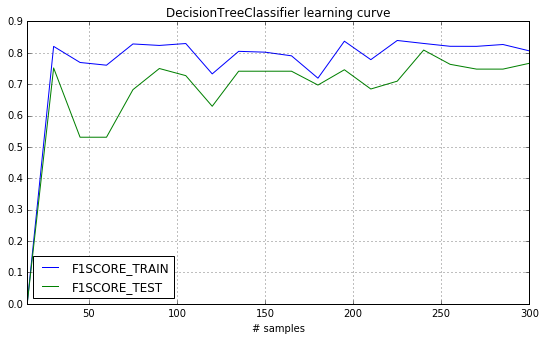

In [531]:
def plot_learning_curve(performance_table, classifier_name):
    ax = performance_table.table[['F1SCORE_TRAIN','F1SCORE_TEST']].plot(
        title="{} learning curve".format(classifier_name), 
        grid=True,figsize=(9,5.06))
                                                                        
plot_learning_curve(perf_1, clf.__class__.__name__)

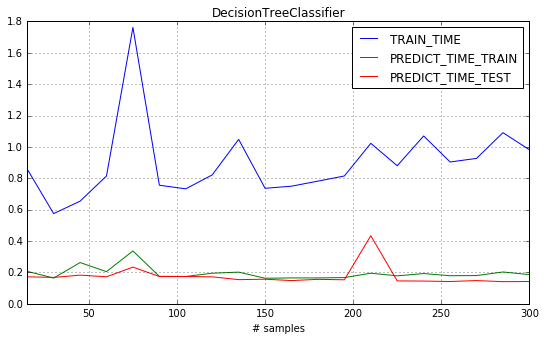

In [488]:
def plot_timings(performance_table, classifier_name):
    ax = performance_table.table[["TRAIN_TIME", "PREDICT_TIME_TRAIN", "PREDICT_TIME_TEST"]].plot(title=classifier_name,
                                                                                grid=True,figsize=(9,5.06))

plot_timings(perf_1, clf.__class__.__name__)

In [489]:
# Second model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

perf_2 = train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes)
print "Perfomance table for GaussianNB: "
print "(*** note ***: times are expressed in milliseconds)" 
perf_2.table

Perfomance table for GaussianNB: 
(*** note ***: times are expressed in milliseconds)


,TRAIN_TIME,PREDICT_TIME_TRAIN,PREDICT_TIME_TEST,F1SCORE_TRAIN,F1SCORE_TEST
# samples,,,,,
15,0.858068,0.355959,0.303984,0.9,0.692913
30,0.551939,0.227213,0.263929,0.615385,0.382979
45,0.49901,0.209808,0.257015,0.734694,0.45098
60,0.562906,0.352144,0.29397,0.716418,0.54902
75,0.626802,0.272036,0.293016,0.705882,0.5
90,0.801086,0.360012,0.365973,0.854962,0.75
105,0.633955,0.284195,0.515938,0.870748,0.75
120,0.852108,0.317097,0.457048,0.846626,0.730159
135,0.831127,0.329018,0.352144,0.834225,0.723077


Let's diplay above data in graphs for Score and for timings, as we did for DecisionTreeClassifier:

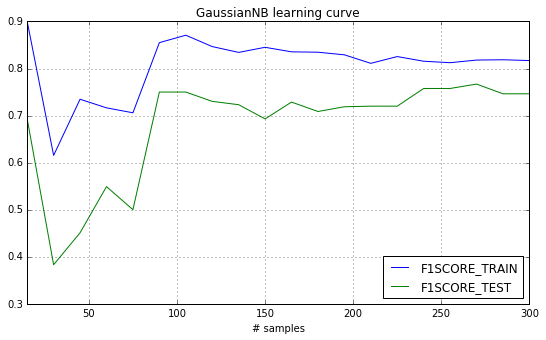

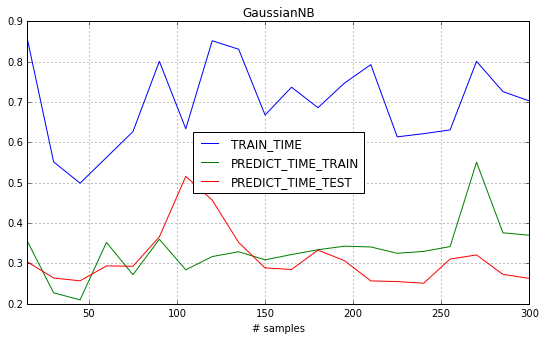

In [490]:
plot_learning_curve(perf_2, clf.__class__.__name__)
plot_timings(perf_2, clf.__class__.__name__)

In [491]:
# Third model
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(penalty='l2', max_iter=300)#, class_weight="balanced")

perf_3 = train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes)
print "Perfomance table for {}: ".format(clf.__class__.__name__)
print "(*** note ***: times are expressed in milliseconds)" 
perf_3.table

Perfomance table for LogisticRegression: 
(*** note ***: times are expressed in milliseconds)


,TRAIN_TIME,PREDICT_TIME_TRAIN,PREDICT_TIME_TEST,F1SCORE_TRAIN,F1SCORE_TEST
# samples,,,,,
15,0.6001,0.360012,0.184059,1,0.522523
30,0.528097,0.142097,0.149012,0.947368,0.786207
45,0.633955,0.148058,0.145912,0.95082,0.783217
60,0.694036,0.138998,0.144005,0.953488,0.780142
75,0.877857,0.149012,0.144958,0.93578,0.791667
90,0.969887,0.149965,0.163078,0.893939,0.826087
105,1.13297,0.198126,0.176907,0.893333,0.791045
120,1.28102,0.478029,0.200987,0.858824,0.791045
135,1.62005,2.48313,0.179052,0.868687,0.828571


Let's diplay above data in graphs for Score and for timings, as we did before:

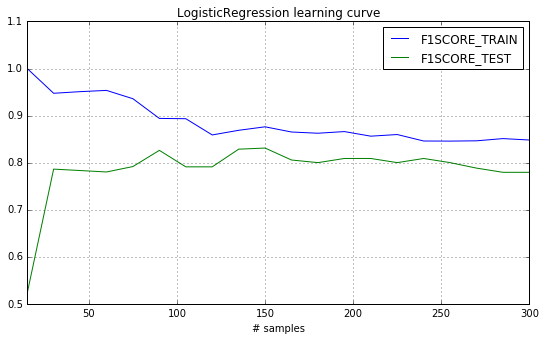

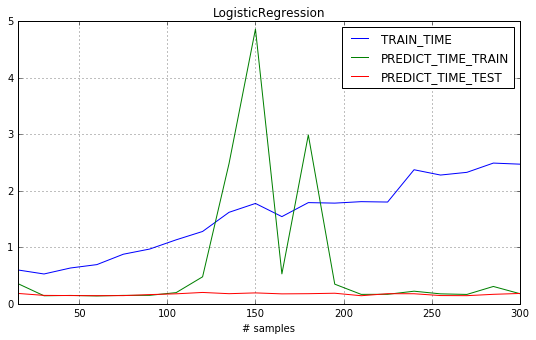

In [492]:
plot_learning_curve(perf_3, clf.__class__.__name__)
plot_timings(perf_3, clf.__class__.__name__)

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [495]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV

def scorer_fun(clf,X,target):
    prediction=clf.predict(X)
    return f1_score(target.astype(str), prediction.astype(str), 
                    pos_label='yes')

clf = DecisionTreeClassifier(min_samples_leaf=8,min_weight_fraction_leaf=0.02, max_depth=3, class_weight='balanced')
#clf = DecisionTreeClassifier()
param_grid = {'min_weight_fraction_leaf': [0.1,0.2,0.4],
              'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [4,6,8,10,12],
              'max_depth': [2,3,4,5,6],
             'class_weight': [None, 'balanced']}

grid = GridSearchCV(clf, param_grid, scoring=scorer_fun, 
                    fit_params=None, n_jobs=1, cv=6)
grid.fit(X_train, y_train)
print grid.best_score_
print scorer_fun(grid.best_estimator_,X_test, y_test)

0.799003229205
0.802816901408


In [496]:
clf = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'],
              'max_iter': [100,200,300,400,500,1000, 3000]}


grid = GridSearchCV(clf, param_grid, scoring=scorer_fun, 
                    fit_params=None, n_jobs=1, cv=3)
grid.fit(X_train[0:300], y_train[0:300])
print grid.best_score_
print scorer_fun(grid.best_estimator_,X_test, y_test)

0.784960864258
0.779411764706


In [497]:
clf = clf = GaussianNB()
param_grid = {}


grid = GridSearchCV(clf, param_grid={},scoring=scorer_fun, 
                    fit_params=None, n_jobs=1, cv=3)
grid.fit(X_train[0:300], y_train[0:300])
print grid.best_score_
print scorer_fun(grid.best_estimator_,X_test, y_test)

0.760911540189
0.746268656716
